# **Sale Price Study**

## Objectives

*   Answer business requirement 1: 
    * The client is interested in discovering how their houses attributes correlate with the typical house Sale Price.

## Inputs

* Generate Dataset: outputs/datasets/collection/house_prices_records.csv

## Outputs

* Generate code that answers business requirement 1 and can later be used to build a Streamlit App

---

# Change working directory

* We are assuming you will store the notebooks in a sub folder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-issues'

# Load Data

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/house_prices_records.csv")
    )
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


---

# Data Exploration

In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df=df, minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

From the overview above, we can see a lot of missing data. To run correlation functions using *Pearson* and *Spearman* methods, we need to ensure there are no missing values. Thus, we will first drop the columns with the highest percentages of missing values.

In [6]:
df = df.drop(columns=['EnclosedPorch', 'GarageFinish', 'WoodDeckSF', 'LotFrontage'])

Next, we can drop the rest of the rows with missing data.

In [7]:
df = df.dropna()
df.index

Int64Index([   0,    1,    2,    5,    6,    7,    8,    9,   10,   12,
            ...
            1444, 1445, 1447, 1448, 1451, 1452, 1454, 1455, 1457, 1459],
           dtype='int64', length=1111)

---

# Correlation Study

Next, we use one hot encoder to separate the different object types of data into binary values. For instance, we're splitting the overall quality variable into columns of the values 1-10.

Also, noteworthy to mention that we may look to fill these values later on since we still have plenty left for this first part of our study; after roughly cutting out the missing data.

In [8]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head()

(1111, 33)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,GarageArea,GarageYrBlt,GrLivArea,LotArea,MasVnrArea,...,BsmtFinType1_ALQ,BsmtFinType1_Unf,BsmtFinType1_Rec,BsmtFinType1_None,BsmtFinType1_LwQ,BsmtFinType1_BLQ,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Fa,KitchenQual_Ex
0,856,854.0,3.0,706,150,548,2003.0,1710,8450,196.0,...,0,0,0,0,0,0,1,0,0,0
1,1262,0.0,3.0,978,284,460,1976.0,1262,9600,0.0,...,1,0,0,0,0,0,0,1,0,0
2,920,866.0,3.0,486,434,608,2001.0,1786,11250,162.0,...,0,0,0,0,0,0,1,0,0,0
5,796,566.0,1.0,732,64,480,1993.0,1362,14115,0.0,...,0,0,0,0,0,0,0,1,0,0
6,1694,0.0,3.0,1369,317,636,2004.0,1694,10084,186.0,...,0,0,0,0,0,0,1,0,0,0


We use `.corr()` for `spearman` and `pearson` methods, and investigate the top 10 correlations
* We know this command returns a pandas series and the first item is the correlation between SalePrice and SalePrice, which happens to be 1, so we exclude that with `[1:]`
* We sort values considering the aboslute value, by setting `key=abs`

Spearman Method

In [9]:
corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual       0.797979
GrLivArea         0.719267
YearBuilt         0.647210
GarageArea        0.613925
GarageYrBlt       0.599462
KitchenQual_TA   -0.593858
YearRemodAdd      0.585968
TotalBsmtSF       0.575491
1stFlrSF          0.546102
KitchenQual_Gd    0.476472
Name: SalePrice, dtype: float64

Pearson Method

In [10]:
corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual       0.782902
GrLivArea         0.704830
GarageArea        0.607465
TotalBsmtSF       0.586064
1stFlrSF          0.578728
KitchenQual_TA   -0.524214
KitchenQual_Ex    0.513110
YearRemodAdd      0.508639
YearBuilt         0.506723
GarageYrBlt       0.490480
Name: SalePrice, dtype: float64

From the above methods, overall quality, general living area, and year-built metric are highly correlated - moderate to strong positive- with our target variable: Sale Price.

To better compare the correlated variables of the house against the sale price, we will analyze their correlation dn provide a visual analysis. We will also re-introduce the previously dropped variables and assume that missing data means that the house, for instance, does not have a basement. This will give us a total square footing to compare against the sale price for a more accurate representation of their correlation

---

## Bivariate Analysis

Since Over Quality(`OverallQual`) is highly correlated with the target variable, we will focus on it first. Then we will focus on the Living Area(`GrLivArea`), the Year Built(`YearBuilt`), the Garage Ara(`GarageArea`) and finally, the dropped variable Remodel date(`YearRemodAdd`).

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

##### Analysis of Overall Quallity and Sale Price

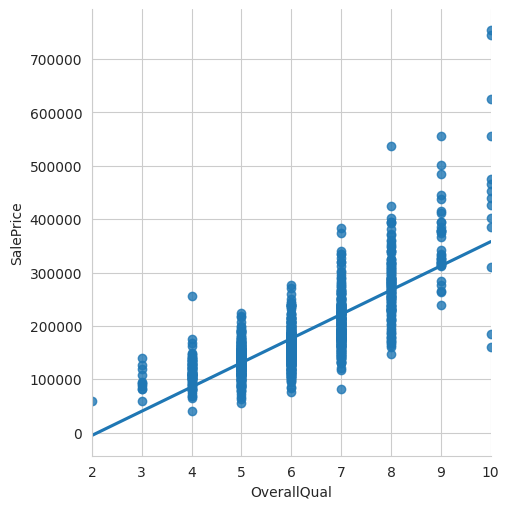

In [12]:
%matplotlib inline
sns.set_style("whitegrid")
sns.lmplot(data=df, x="OverallQual", y="SalePrice", ci=None)
plt.show()

We can see a trend in data. The above plot clearly shows a linear relationship between `SalePrice` and `OverallQal`. The  `SalePrice` increases with an increase in `OverallQal`.

Next we will analyze the `GrLivArea` variable since it is highly correlated with our target variable.

##### Analysis of Living Area and Sale Price

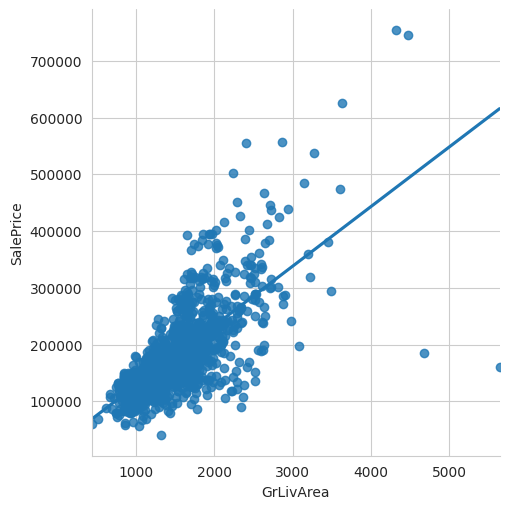

In [13]:
sns.lmplot(data=df, x="GrLivArea", y="SalePrice", ci=None)
plt.show()

The high correlation between `SalePrice` and `GrLivArea` is reflected in the graph above, despite a few outliers.

Next the `YearBuilt` and `SalePrice` will be analyzed.

##### Analysis Year Built and Sale Price

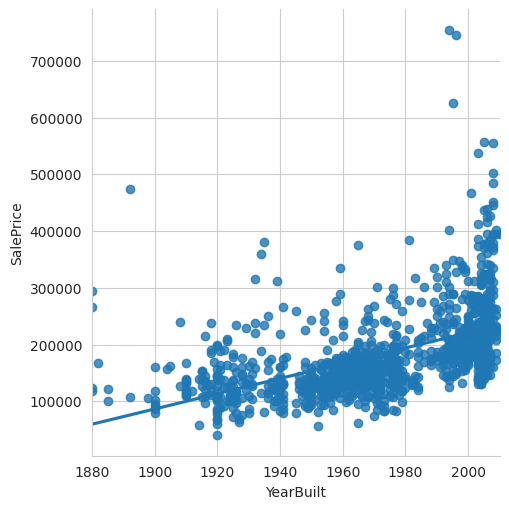

In [14]:
sns.lmplot(data=df, x="YearBuilt", y="SalePrice", ci=None)
plt.show()

The linear relationship between the variables is clearer in cases of recently built houses.

Next we'll consider the relationship between `GarageArea` and `SalePrice`.

##### Analysis Garage Area and Sale Price

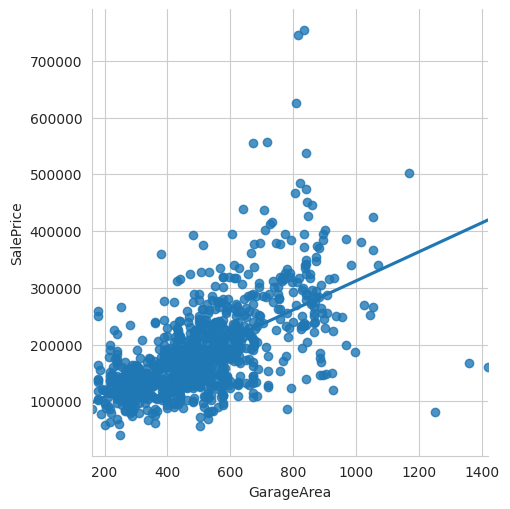

In [15]:
sns.lmplot(data=df, x="GarageArea", y="SalePrice", ci=None)
plt.show()

The high correlation between `SalePrice` and `GarageArea` is reflected in the graph above, despite a few outliers.

Next we analyze the `YearRemodAdd`.

##### Analysis Remodel Date and Sale Price

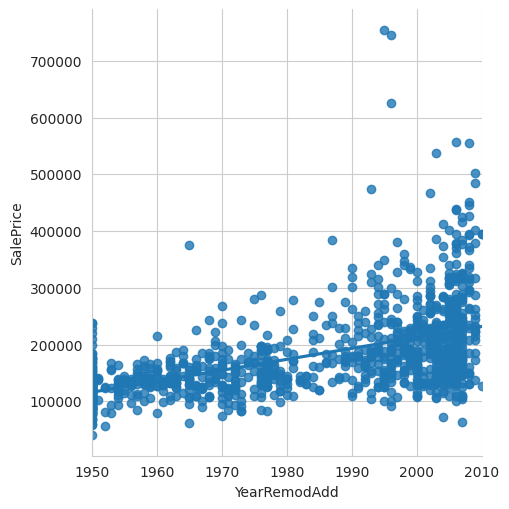

In [16]:
sns.lmplot(data=df, x="YearRemodAdd", y="SalePrice", ci=None)
plt.show()

Remodal Date very highly correlated with our target variable SalePrice and also it follows a strong linear trend.

Overview
* The analysis above visualized the positive correlation among all the compared variables against the key variable sale price.

* When preparing the data for our ml pipeline, we will need to address several outliers later.

* Also, an interesting trend appears when we visualize the data whilst separating the houses into their overall quality scores. 

* Next, we will combine the variables, visualize their correlation with each other, and see if there is any change in trend in the data.

---

## Multivariate Analysis

`GrLivArea` with `SalePrice` analysis was introduced above. Now we'll include the third variable `OverallQual` which represents the overall quality of the house and see if there is any change in trend in the data.

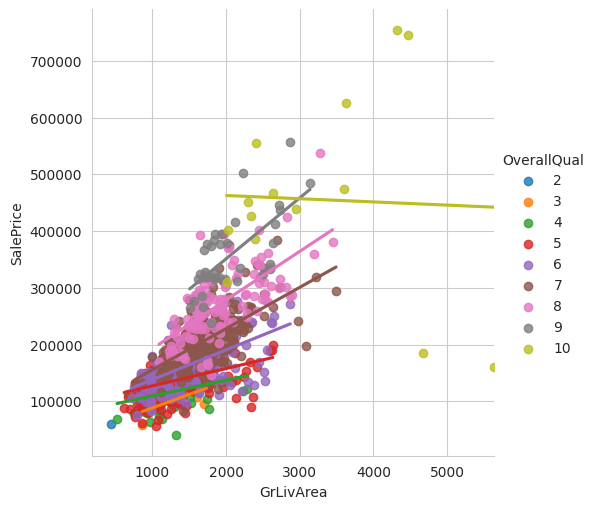

In [17]:
sns.lmplot(data=df, x="GrLivArea", y="SalePrice", ci=None, hue="OverallQual")
plt.show()

Then we will analyze the `YearBuilt` with `SalePrice` and the `OverallQual`.

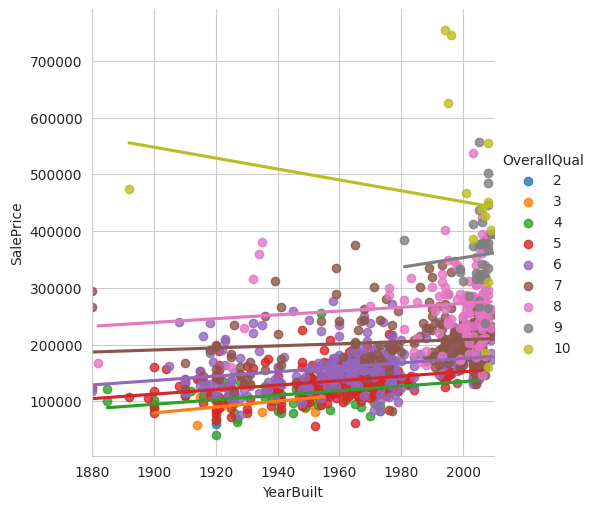

In [18]:
sns.lmplot(data=df, x='YearBuilt', y='SalePrice', ci=None, hue='OverallQual')
plt.show()

Next we will analyze the `GarageArea` with `SalePrice` and the `OverallQual`.

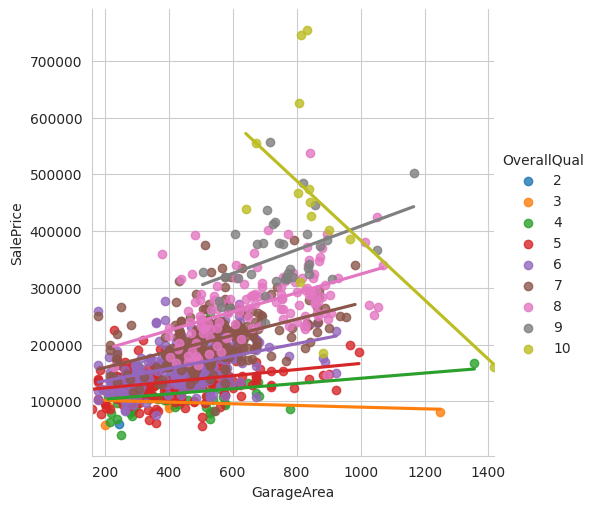

In [19]:
sns.lmplot(data=df, x='GarageArea', y='SalePrice', ci=None, hue='OverallQual')
plt.show()

Now, we will combine the variables correlated to our target variable. 

We will start with `YearBuilt` and `OverallQual`.

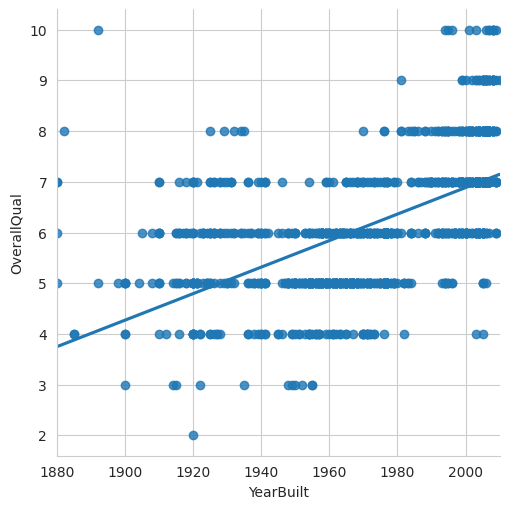

In [20]:
sns.lmplot(data=df, x='YearBuilt', y='OverallQual', ci=None)
plt.show()

Then, with `YearRemodAdd` and `OverallQual`.

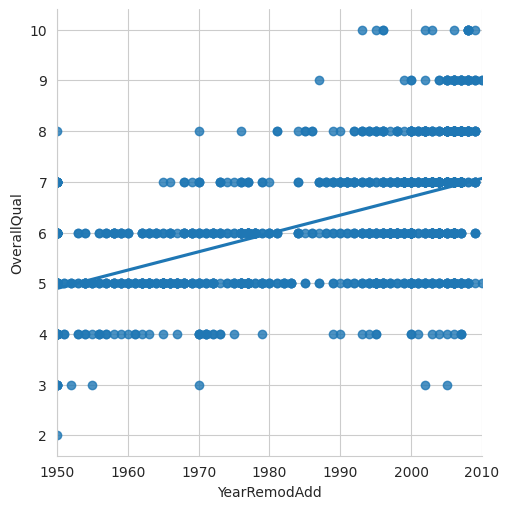

In [21]:
sns.lmplot(data=df, x='YearRemodAdd', y='OverallQual', ci=None)
plt.show()

Next with `GarageArea` and `GrLivArea`.

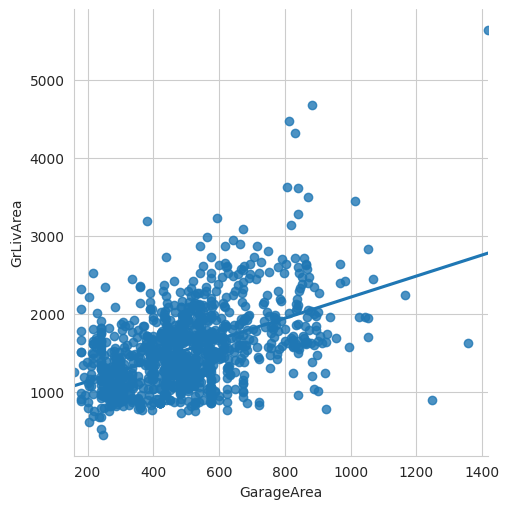

In [22]:
sns.lmplot(data=df, x='GarageArea', y='GrLivArea', ci=None)
plt.show()

And the `GrLivArea` with `OverallQual`.

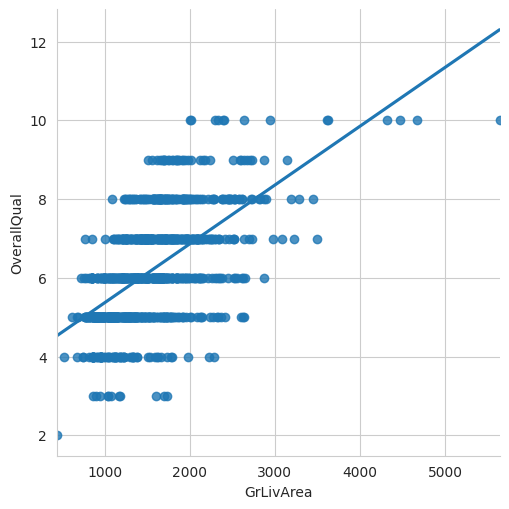

In [23]:
sns.lmplot(data=df, x='GrLivArea', y='OverallQual', ci=None)
plt.show()

---

# Conclusion and Next Steps

Looking at the correlation and plot analysis, we notice several things that help us answer the first business question: 

`The client is interested in discovering how house attributes correlate with the typical house Sale Price.`

To conclude:
* The sale price of a house is higher for larger houses.
* The sale price of a house is generally higher for homes of higher overall quality.
* The sale price of a house is sometimes higher if it was built recently. Yet, we should consider that this occurs due to the newer the house construction, the higher generally in quality.
* One other hypothesis we proposed was that houses with recent remodel work have higher Sale Price. This also shows a weak correlation with Sale Price but has a generally stronger correlation with Overall Quality, which is the most significant variable for predicting Sale Price

Next we will work on the Data Cleaning.